In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file = ROOT.TFile.Open("run3BtoM_4hcopy_ratioFR_cov_mat_0_2.root")
#direc = file.Get("QFillByFillAnalyzerDB")
hist = ROOT.TH1D()
hist = file.Get("calo_histogram_sum_ratio")
hcov = ROOT.TH2D()
hcov = file.Get("hcov")

In [3]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [4]:
fit_start=30000
fit_stop=300000
fit_range=hist.FindBin(fit_stop)-hist.FindBin(fit_start)+1

T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

y_val=np.empty(fit_range)
y_err=np.empty(fit_range)
x_val=np.empty(fit_range)

for ibin in range (0,fit_range):
    y_val[ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
    y_err[ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
    x_val[ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))

y_cov = np.empty(shape=(fit_range,fit_range))

for irow in range (0, fit_range):
      for icol in range(0, fit_range):
            y_cov[irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))

In [5]:
print(y_cov[0][0])
mat=np.linalg.eigvalsh(y_cov)
for irow in range (0, fit_range):
    if mat[irow]<=0:
        print(irow,"\n")

3.273694096610478e-09


In [6]:
def fit_func(time: np.double,
             asym: np.double = 0.0, 
             R: np.double = 0.0, 
             phi: np.double = 0.0,
             asym_cbo = 0.0,
             tau_cbo = 0.0,
             omega_cbo = 0.0,
             phi_cbo = 0.0,
             asym_cbo_A = 0.0,
             phi_cbo_A=0.0,
             A_cbo_phi= 0.0,
             phi_cbo_phi=0.0,
             asym_vw= 0.0,
             tau_vw = 0.0,
             omega_vw = 0.0,
             phi_vw = 0.0,
             asym_vbo= 0.0,
             tau_vbo = 0.0,
             omega_vbo = 0.0,
             phi_vbo = 0.0,
             asym_2cbo= 0.0,
             tau_2cbo = 0.0,
             omega_2cbo = 0.0,
             phi_2cbo = 0.0,
             tau_rlx = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    N2cbo=(asym_2cbo*exp(-time/tau_2cbo)*cos(omega_2cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/tau_2cbo)*cos(omega_2cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/tau_2cbo)*cos(omega_2cbo*(time - T_a/2) - phi_2cbo))
    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    
    f=(1+ asym*exp(-time/tau_rlx)*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*exp(-(time+T_a/2)/tau_rlx)*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*exp(-(time-T_a/2)/tau_rlx)*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [7]:
p_init=[2.28839e-01,
        0.000000,
        4.02000e+00,
        2.42604e-03,
        2.54062e+05,
        2.330e-03,
        5.56481e-01,
        6.91318e-04,
        -5.78075e+00,
        6.39026e-05,
        3.52887e+01,
        2.36536e-04,
        1.38419e+05,
        1.389e-02,
        2.73495e-01,
        -1.00112e-03,
        3.48295e+04,
        1.407e-02,
        -1.99555e+01,
        1.10668e-04,
        1.70775e+05,
        4.69116e-03,
        3.06805e+00,
        3.05e+08]

In [8]:
pars2, cov2 = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_err)

In [9]:
p_init=pars2

In [10]:
pars_final, cov_final = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_cov)

In [11]:
stdevs = np.sqrt(np.diag(cov_final))
for ipar in range(0,23):
    print(pars_final[ipar],"  +-  ",stdevs[ipar],"  \n")

0.2294043544325235   +-   1.3525396529903126e-05   

-35.3857548170842   +-   0.39653039776478627   

4.023020840229232   +-   6.0113022462584275e-05   

0.0018682977108758327   +-   2.0855526623395688e-05   

228908.17095467707   +-   7250.025142997696   

0.0023289200791047865   +-   1.3906230871100442e-07   

-0.45739964494878743   +-   0.011264264065129492   

0.00038693900464292075   +-   6.2298563426319e-05   

-6.665761435723218   +-   0.15983744738612932   

-6.772388004370043e-05   +-   6.352456173478954e-05   

35.086593002922704   +-   0.9223493696105187   

0.00046403906538714114   +-   3.6405060464074395e-05   

85771.38014825906   +-   8828.536684258292   

0.013892511047535139   +-   1.1972186954121363e-06   

-0.2334403980769332   +-   0.07806716476026318   

-0.0039012981739935957   +-   0.0006169243813706466   

15899.95126264694   +-   1070.760155849914   

0.014100046436990163   +-   4.219364953634876e-06   

-18.801785113521973   +-   0.15739686452459417   

6.5445

In [12]:
pars_final

array([ 2.29404354e-01, -3.53857548e+01,  4.02302084e+00,  1.86829771e-03,
        2.28908171e+05,  2.32892008e-03, -4.57399645e-01,  3.86939005e-04,
       -6.66576144e+00, -6.77238800e-05,  3.50865930e+01,  4.64039065e-04,
        8.57713801e+04,  1.38925110e-02, -2.33440398e-01, -3.90129817e-03,
        1.58999513e+04,  1.41000464e-02, -1.88017851e+01,  6.54451447e-05,
       -1.50757724e+10,  4.66014981e-03,  3.30623735e+00,  3.70422862e+08])

In [13]:
stdevs

array([1.35253965e-05, 3.96530398e-01, 6.01130225e-05, 2.08555266e-05,
       7.25002514e+03, 1.39062309e-07, 1.12642641e-02, 6.22985634e-05,
       1.59837447e-01, 6.35245617e-05, 9.22349370e-01, 3.64050605e-05,
       8.82853668e+03, 1.19721870e-06, 7.80671648e-02, 6.16924381e-04,
       1.07076016e+03, 4.21936495e-06, 1.57396865e-01, 7.23093445e-06,
       2.09685951e+13, 1.97858295e-06, 2.08387420e-01, 7.66481298e+07])

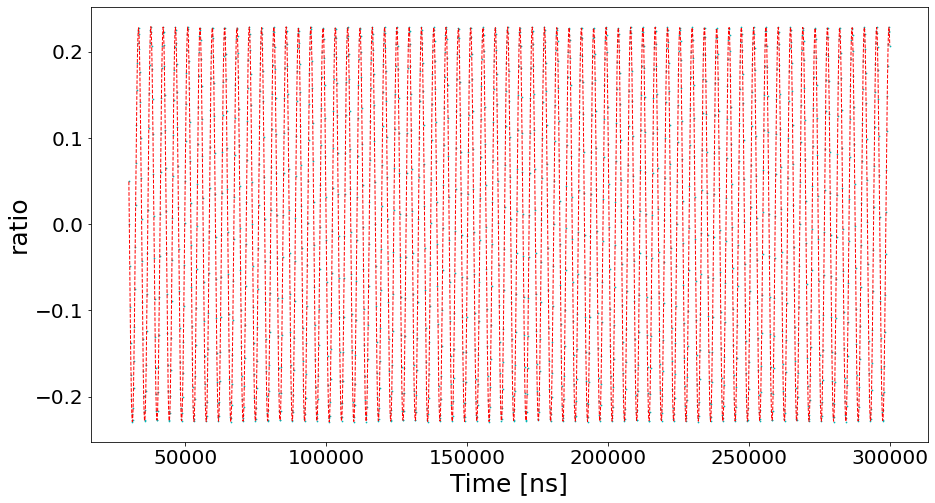

In [14]:
# Plot the noisy exponential data
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.scatter(x_val, y_val, s=0.5, color='#00b3b3', label='Data')
plt.plot(x_val, fit_func(x_val, *pars_final), linestyle='--', linewidth=1, color='red')
plt.xlabel('Time [ns]',fontsize=25)
plt.ylabel('ratio',fontsize=25)
#plt.ylim([0.0, 6000000000])
#plt.xlim([100000,150000])
plt.show()

In [15]:
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
# Calculate the residuals
res = (y_val - fit_func(x_val, *pars_final))/y_err

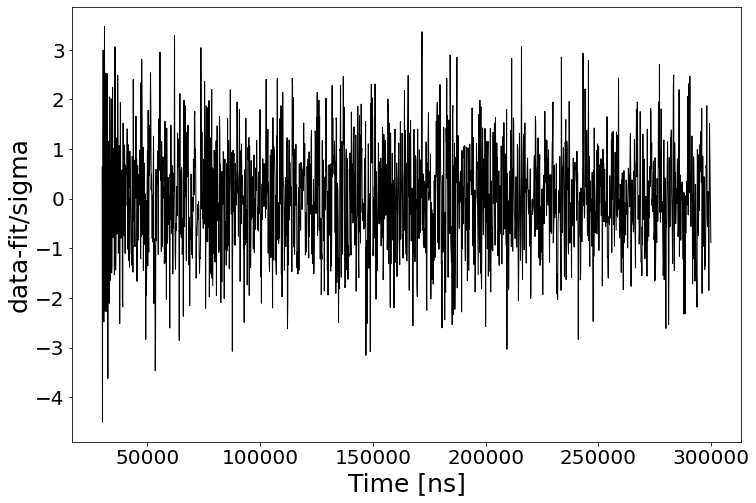

In [16]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(x_val, res, linestyle='solid', linewidth=1, color='black')
plt.xlabel('Time [ns]',fontsize=25)
plt.ylabel('data-fit/sigma',fontsize=25)
plt.savefig('run3btom_res.jpg')

In [17]:
stdevs

array([1.35253965e-05, 3.96530398e-01, 6.01130225e-05, 2.08555266e-05,
       7.25002514e+03, 1.39062309e-07, 1.12642641e-02, 6.22985634e-05,
       1.59837447e-01, 6.35245617e-05, 9.22349370e-01, 3.64050605e-05,
       8.82853668e+03, 1.19721870e-06, 7.80671648e-02, 6.16924381e-04,
       1.07076016e+03, 4.21936495e-06, 1.57396865e-01, 7.23093445e-06,
       2.09685951e+13, 1.97858295e-06, 2.08387420e-01, 7.66481298e+07])

In [18]:
fou=abs(np.fft.fft(res))
xfft= np.linspace(0,6.667,num=1801)
xfft[800]

2.963111111111111

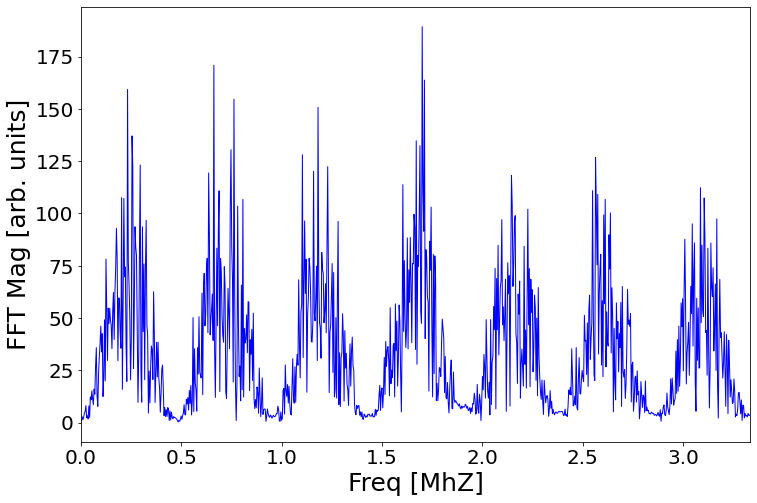

In [19]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(xfft, fou, linestyle='solid', linewidth=1, color='blue')
plt.xlim([0,6.667/2])
plt.xlabel('Freq [MhZ]',fontsize=25)
plt.ylabel('FFT Mag [arb. units]',fontsize=25)
plt.savefig('run3btom_fft.jpg')

In [20]:
chi2=np.dot((np.transpose(y_val-fit_func(x_val, *pars_final))),(np.dot((np.linalg.inv(y_cov)),(y_val-fit_func(x_val, *pars_final)))))

In [21]:
chi2

1855.141199670225

In [22]:
ndf=fit_range-len(pars_final)

In [23]:
red_chi2=chi2/ndf

In [24]:
red_chi2

1.0439736632921919

In [25]:
ndf

1777